Linear Regression

In [0]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
direct_marketing = pd.read_csv('DATASET_DIRECT_MARKETING.csv')

Feature exploration: Create histogram for 'AmountSpent' & 'Salary'.

In [0]:
direct_marketing.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [0]:
direct_marketing.isnull().sum(axis=0)

Age              0
Gender           0
OwnHome          0
Married          0
Location         0
Salary           0
Children         0
History        303
Catalogs         0
AmountSpent      0
dtype: int64

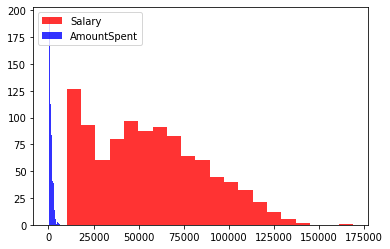

In [0]:
import matplotlib.pyplot as plt
plt.hist(direct_marketing['Salary'],
         bins = 20,
         alpha=0.8, 
         color='red',
        label = 'Salary')

plt.hist(direct_marketing['AmountSpent'],
        bins = 20,
        alpha = 0.8,
        color = 'blue',
        label = 'AmountSpent')

plt.legend(loc = 'upper left')
plt.show()

From the histogram we can see that both the variables are right skewed and do not have a normal distribution. 

Going to predict 'AmountSpent'. The shape of 'Salary' and 'AmountSpent' go against one of the statistical assumptions of multiple linear regression. 

Since both the features are a little right skewed, it goes against the normality assumption that assumes all continuous variables to be multivariate normal. We can normalize the features by taking their square root.


In [0]:
import numpy as np
direct_marketing['AmountSpentTransform'] = np.sqrt(direct_marketing['AmountSpent'])
direct_marketing['SalaryTransform'] = np.sqrt(direct_marketing['Salary'])


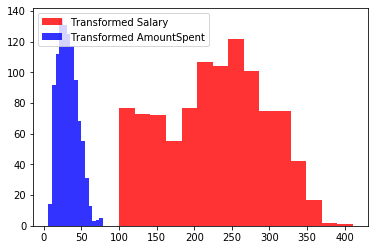

In [0]:
plt.hist(direct_marketing['SalaryTransform'],
         bins = 15,
         alpha=0.8, 
         color='red',
        label = 'Transformed Salary')

plt.hist(direct_marketing['AmountSpentTransform'],
        bins = 15,
        alpha = 0.8,
        color = 'blue',
        label = 'Transformed AmountSpent')

plt.legend(loc = 'upper left')
plt.show()



Performing LASSO and Ridge multiple linear regression to predict 'AmountSpent'. 

Feature Engineering


In [0]:
# Preprocess categorical values with Label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
direct_marketing['AgeTransform'] = le.fit_transform(direct_marketing['Age'])
direct_marketing['GenderTransform'] = le.fit_transform(direct_marketing['Gender'])
direct_marketing['OwnHomeTransform'] = le.fit_transform(direct_marketing['OwnHome'])
direct_marketing['MarriedTransform'] = le.fit_transform(direct_marketing['Married'])
direct_marketing['LocationTransform'] = le.fit_transform(direct_marketing['Location'])

In [0]:
# check for nulls
direct_marketing['History'].isnull().sum(axis=0)
direct_marketing['History'].value_counts()

# Imputing nulls using most frequent value
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='most_frequent', axis=0)
imputer.fit_transform(X)

High      255
Low       230
Medium    212
Name: History, dtype: int64

In [0]:
direct_marketing_fs = direct_marketing[['SalaryTransform', 'Children', 'Catalogs','AgeTransform', 'GenderTransform', 'OwnHomeTransform', 'MarriedTransform','LocationTransform']]
target = direct_marketing[['AmountSpentTransform']]

In [0]:
direct_marketing_fs.head()

,SalaryTransform,Children,Catalogs,AgeTransform,GenderTransform,OwnHomeTransform,MarriedTransform,LocationTransform
0,217.944947,0,6,1,0,0,1,1
1,252.190404,0,6,0,1,1,1,0
2,116.189500,0,18,2,0,1,1,0
3,292.574777,1,18,0,1,0,0,0
4,261.533937,0,12,0,0,0,1,0


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(direct_marketing_fs)

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_std, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [0]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas = [0.01, 0.1, 0.5, 1, 5, 10])

In [0]:
model_cv = lasso_cv.fit(x_train, y_train)
model_cv.alpha_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1

In [0]:
model_cv.score(x_train, y_train)

In [0]:
model_cv.score(x_test, y_test)

0.7987278292951447

Ridge Regression

In [0]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = [0.01, 0.1, 0.5, 1, 5, 10])

In [0]:
# Fit the linear regression
ridge_model_cv = ridge_cv.fit(x_train, y_train)
ridge_model_cv.alpha_

1.0

In [0]:
ridge_model_cv.score(x_train, y_train)

0.7981049940543106

In [0]:
ridge_model_cv.score(x_test, y_test)

0.8004632929292838

The Ridge regression model seems to perform better than the Lasso regression model in terms of fit as well as prediction. 
The alpha value is chosen through cross-validation for the the best performing model.

The alpha value chosen for Lasso is 0.1

The alpha value chosen for Ridge is 1.0

Plotting the fitted values of your best model and the residuals. 




In [0]:
fitted_values = model_cv.predict(x_test)
fitted_value = fitted_values.reshape(-1,1) 
#fitted_value[:,np.newaxis]
residuals = y_test.values - fitted_value
fitted_value.shape

(200, 1)

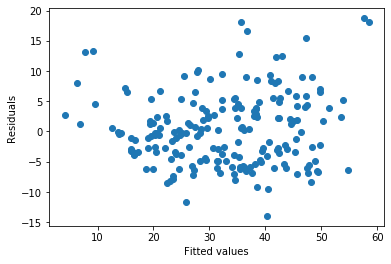

In [0]:
from numpy.polynomial.polynomial import polyfit
plt.scatter(fitted_value, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

There seems to be no pattern in the residual values. Therefore satisfying statistical assumptions.


Classificiation

In [0]:
import pandas as pd
flight_delays = pd.read_table('flight_delays.txt', delimiter=',')
flight_delays.head()

,Unnamed: 0,schedtime,carrier,deptime,dest,distance,date,flightnumber,origin,weather,dayweek,daymonth,tailnu,delay
0,1,1455,OH,1455,JFK,184,1/1/2004,5935,BWI,0,4,1,N940CA,ontime
1,2,1640,DH,1640,JFK,213,1/1/2004,6155,DCA,0,4,1,N405FJ,ontime
2,3,1245,DH,1245,LGA,229,1/1/2004,7208,IAD,0,4,1,N695BR,ontime
3,4,1715,DH,1709,LGA,229,1/1/2004,7215,IAD,0,4,1,N662BR,ontime
4,5,1039,DH,1035,LGA,229,1/1/2004,7792,IAD,0,4,1,N698BR,ontime


In [0]:
flight_delays.shape

(2201, 14)

In [0]:
flight_delays.delay.value_counts()

ontime     1773
delayed     428
Name: delay, dtype: int64

In [0]:
428/(1773+428)
# This shows that the data is imbalanced with only 19% of the data corresponding to the delay class.

0.19445706497046797

Performing logistic regression to predict flight delays. Implementing elastic-net for variable selection. 


In [0]:
flight_delays.dtypes

Unnamed: 0       int64
schedtime        int64
carrier         object
deptime          int64
dest            object
distance         int64
date            object
flightnumber     int64
origin          object
weather          int64
dayweek          int64
daymonth         int64
tailnu          object
delay           object
dtype: object

In [0]:
print(flight_delays.carrier.unique())
flight_delays['carrier'] = flight_delays['carrier'].astype('category')
flight_delays['carrier_le'] = flight_delays['carrier'].cat.codes

['OH' 'DH' 'DL' 'MQ' 'UA' 'US' 'RU' 'CO']


In [0]:
flight_delays.daymonth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [0]:
flight_delays.dayweek.unique()

array([4, 5, 6, 7, 1, 2, 3])

In [0]:
flight_delays.weather.unique()

array([0, 1])

In [0]:
print(flight_delays.dest.unique())
flight_delays['dest'] = flight_delays['dest'].astype('category')
flight_delays['dest_le'] = flight_delays['dest'].cat.codes

['JFK' 'LGA' 'EWR']


In [0]:
print(flight_delays.date.unique())
#since the only relevant data in this feature is the day of the month, #which is already captured in 
#the daymonth variable. We can drop this variable

['1/1/2004' '1/2/2004' '1/3/2004' '1/4/2004' '1/5/2004' '1/6/2004'
 '1/7/2004' '1/8/2004' '1/9/2004' '1/10/2004' '1/11/2004' '1/12/2004'
 '1/13/2004' '1/14/2004' '1/15/2004' '1/16/2004' '1/17/2004' '1/18/2004'
 '1/19/2004' '1/20/2004' '1/21/2004' '1/22/2004' '1/23/2004' '1/24/2004'
 '1/25/2004' '1/26/2004' '1/27/2004' '1/28/2004' '1/29/2004' '1/30/2004'
 '1/31/2004']


In [0]:
print(flight_delays.origin.unique())
flight_delays['origin'] = flight_delays['origin'].astype('category')
flight_delays['origin_le'] = flight_delays['origin'].cat.codes

['BWI' 'DCA' 'IAD']


In [0]:
flight_delays.tailnu.unique()
len(flight_delays.tailnu.unique())
# since there are many unique values and these are categorical variables, this variable can be dropped

549

In [0]:
import numpy as np

print(flight_delays.delay.unique())
flight_delays['delay_le'] = np.where(flight_delays['delay'] == 'delayed', 1, 0)
print(flight_delays.delay_le.unique())

['ontime' 'delayed']
[0 1]


In [0]:
# since there are many unique values and these are categorical values, this variable can be dropped
flight_delays.flightnumber.unique()

array([5935, 6155, 7208, 7215, 7792, 7800, 7806, 7810, 7812, 7814, 7924,
        746, 1746, 1752, 1756, 1762, 1768, 4752, 4760, 4784, 4956, 4964,
       4966, 4968, 4976,  846, 2164, 2168, 2172, 2176, 2180, 2188, 2403,
       2675, 2303, 2703,  808,  814, 7299, 7302, 7303, 7304, 2497, 2385,
       2261, 2336, 2216, 2156, 2664, 2181, 7211, 7790, 7808, 7816, 4960,
       2160, 2184,  806, 7307, 7371, 2855, 2582, 2761, 2692, 3276, 2879,
       1744, 1748, 1760, 1764, 2267, 2097, 4771, 4972, 2166, 2170, 2174,
       2178, 2182, 2186, 2603,  810, 1740, 1742, 1750, 1754, 1766, 4952,
       4954, 4970, 1479, 2162, 1758, 3372,  816, 2367, 7305, 7684, 7818,
       2229, 2361, 1767, 2254])

In [0]:
flight_delays['hour'] =  flight_delays['schedtime']//100
flight_delays['minute'] = flight_delays['schedtime']%100

The combination schedtime and deptime gives us the target 'delay' variable and also in a real world scenario we would need to predict the delay without any information about the departure time. Hence, the deptime is dropped and hour and minute of the schedtime is considered.

In [0]:
flight_delays.isnull().sum(axis=0)

Unnamed: 0      0
schedtime       0
carrier         0
deptime         0
dest            0
distance        0
date            0
flightnumber    0
origin          0
weather         0
dayweek         0
daymonth        0
tailnu          0
delay           0
carrier_le      0
dest_le         0
origin_le       0
delay_le        0
hour            0
minute          0
dtype: int64

In [0]:
flight_delays.dtypes

Unnamed: 0         int64
schedtime          int64
carrier         category
deptime            int64
dest            category
distance           int64
date              object
flightnumber       int64
origin          category
weather            int64
dayweek            int64
daymonth           int64
tailnu            object
delay             object
carrier_le          int8
dest_le             int8
origin_le           int8
delay_le           int64
hour               int64
minute             int64
dtype: object

In [0]:
data = flight_delays.drop(['Unnamed: 0', 'delay', 'date', 'origin', 'dest', 'carrier', 'tailnu','delay_le', 'deptime', 'flightnumber', 'schedtime'], axis=1)

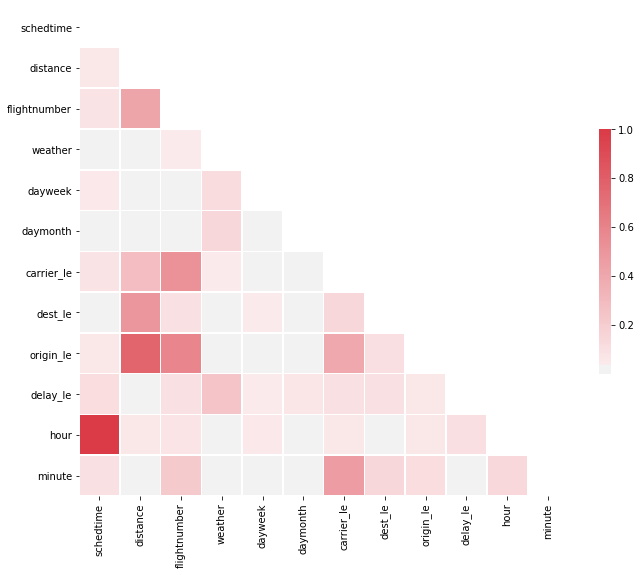

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

data = flight_delays.drop(['Unnamed: 0', 'delay', 'date', 'origin', 'dest', 'carrier','deptime'], axis=1)
#ww2_weath_float_vars.head()
corr_matrix = data.corr().abs()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [0]:
data.head()

,distance,weather,dayweek,daymonth,carrier_le,dest_le,origin_le,hour,minute
0,184,0,4,1,4,1,0,14,55
1,213,0,4,1,1,1,1,16,40
2,229,0,4,1,1,2,2,12,45
3,229,0,4,1,1,2,2,17,15
4,229,0,4,1,1,2,2,10,39


In [0]:
target = flight_delays['delay_le']

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(data)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=1
                                                   )

In [0]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
clf = LogisticRegressionCV(solver = 'saga',
                           penalty = 'elasticnet',
                           #l1_ratios = [0.1, 0.2, 0.3, 0.5, 0.8],
                           l1_ratios = [0.2],
                           Cs = 100,
                           n_jobs = -1,
                           random_state = 0,
                           max_iter = 1000
)

In [0]:
clf_model = clf.fit(x_train, y_train) 
#clf_model.score(x_train, y_train)
#clf_model.score(x_test, y_test)

In [0]:
clf_model.l1_ratio_

array([0.2])

The L1 ratio of 0.2 seems to give the best results.

In [0]:
clf_model.

Create ROC curves for your train and test sets. 

In [0]:
x_train_probs = clf_model.predict_proba(x_train)
x_train_probs.shape

(1760, 2)

In [0]:
#AUC
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train, x_train_probs[:,1])
metrics.auc(fpr, tpr)

0.6535409734202157

In [0]:
x_test_probs = clf_model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test_probs[:,1])
metrics.auc(fpr, tpr)

0.67545349548203

In [0]:
x_test_df = pd.DataFrame(x_test)
x_test_df['predictions_1'] = x_test_probs[:, 1] 
x_train_df = pd.DataFrame(x_train)
x_train_df['predictions_1'] = x_train_probs[:, 1] 

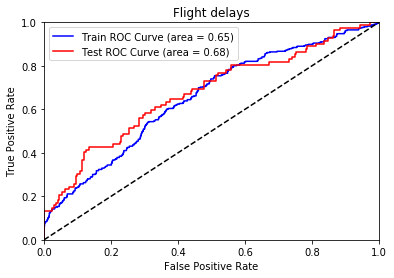

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.plot(roc_curve(y_train, x_train_df['predictions_1'])[0],roc_curve(y_train, x_train_df['predictions_1'])[1], 
         color = 'blue', label='Train ROC Curve (area = %0.2f)' % roc_auc_score(y_train, x_train_df['predictions_1']))

plt.plot(roc_curve(y_test, x_test_df['predictions_1'])[0],roc_curve(y_test, x_test_df['predictions_1'])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, x_test_df['predictions_1']))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Flight delays')
plt.legend()
plt.show()

Based on the AUC values and ROC curve, the model seems to be underfitting. 

The AUC value for the train set is 0.65

The AUC value for the test set is 0.68

Decide on a threshold to classify flights in your test set as "on time", or "delayed". Create a confusion matrix. 

In [0]:
x_test_df['resp'].shape
y_test.shape

(441,)

In [0]:
from sklearn.metrics import confusion_matrix
x_test_df['resp'] = x_test_df['predictions_1'].map(lambda x: 1 if x > 0.3 else 0)
TN, FP, FN, TP = confusion_matrix(y_test, x_test_df['resp']).ravel()
print(confusion_matrix(y_test, x_test_df['resp']))

[[359   0]
 [ 71  11]]


In [0]:

# Sensitivity - TP/TP+FN
recall = TP/(TP+FN)
print("Sensitivity = ", recall)
# Specificity - TN/TN+FP
specificity = TN/(TN+FP)
print("Specificity = ", specificity)
# PPV - TP/TP+FP
precision = TP/(TP+FP)
print("PPV = ", precision)
# NPV - TN/TN+FN
npv = TN/(TN+FN)
print("NPV = ", npv)
# F1 score - 2(precision * recall)/precision+recall
F1_score = (2*(precision * recall))/(precision + recall)
print("F1 score = ", F1_score)
# Accuracy - correct classifications/ Total observations
print("Accuracy = ", (TP+TN)/(TP+FP+TN+FN))

Sensitivity =  0.13414634146341464
Specificity =  1.0
PPV =  1.0
NPV =  0.8348837209302326
F1 score =  0.23655913978494622
Accuracy =  0.8390022675736961


A threshold value of 0.3 is picked since higher values result in decrease in the recall and F1 score.

**KNN**




In [0]:
#checking if the features are a numpy array
type(x_train)

numpy.ndarray

In [0]:
from sklearn import neighbors
knn_clf = neighbors.KNeighborsClassifier(100, weights = 'uniform') #distance -try 

In [0]:
knn_model = knn_clf.fit(x_train, y_train)
knn_model.score(x_train, y_train)

0.803409090909091

In [0]:
knn_model.score(x_test, y_test)

0.8140589569160998

In [0]:
x_test_probs = knn_model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, x_test_probs[:,1])
metrics.auc(fpr, tpr)

0.6788504653848766

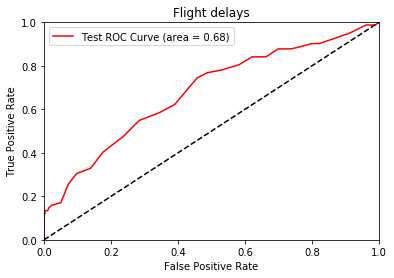

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
plt.plot(roc_curve(y_test, x_test_probs[:,1])[0],roc_curve(y_test, x_test_probs[:,1])[1], 
         color = 'red', label='Test ROC Curve (area = %0.2f)' % roc_auc_score(y_test, x_test_probs[:,1]))


plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Flight delays')
plt.legend()
plt.show()

The KNN and Logistic Regression model have almost the same values of AUC with KNN performing better by 0.003.